<a href="https://colab.research.google.com/github/AishwaryaVelumani/Deep-Learning/blob/master/Binary_classification_on_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code Source: DL with Python Book by Francois Chollet

In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index= dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review= ''.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
def vectorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train= np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
from keras import models 
from keras import layers

In [ ]:
omodel= models.Sequential()
omodel.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
omodel.add(layers.Dense(16,activation='relu'))
omodel.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
#model.compile(optimizer='rmsprop',
 #             loss='binary_crossentropy',
  #            metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

omodel.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
x_val=x_train[:10000]
partial_x_train= x_train[10000:]
y_val=y_train[:10000]
partial_y_train= y_train[10000:]

In [ ]:
ohistory= omodel.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.6035 - binary_accuracy: 0.6725 - val_loss: 0.5011 - val_binary_accuracy: 0.8516
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3914 - binary_accuracy: 0.8880 - val_loss: 0.3449 - val_binary_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2574 - binary_accuracy: 0.9197 - val_loss: 0.2918 - val_binary_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1929 - binary_accuracy: 0.9392 - val_loss: 0.2801 - val_binary_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1552 - binary_accuracy: 0.9521 - val_loss: 0.2916 - val_binary_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1266 - binary_accuracy: 0.9607 - val_loss: 0.2954 - val_binary_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

In [ ]:
ohistory_dict= ohistory.history
ohistory_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

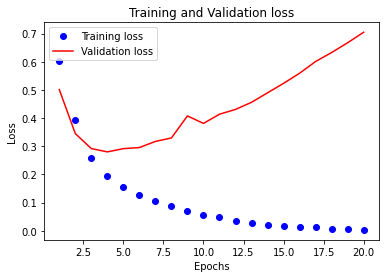

In [ ]:
import matplotlib.pyplot as plt

loss_values= ohistory_dict['loss']
val_loss_values=ohistory_dict['val_loss']
acc= ohistory_dict['binary_accuracy']
val_acc= ohistory_dict['val_binary_accuracy']

epochs=range(1,len(acc)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

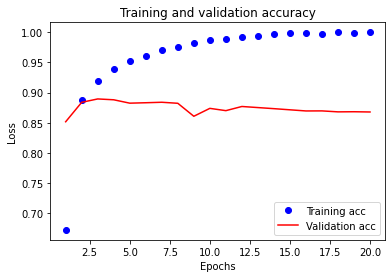

In [ ]:
plt.clf()
acc_values= ohistory_dict['binary_accuracy']
val_acc_values= ohistory_dict['val_binary_accuracy']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#model.fit(x_train,y_train,epochs=4,batch_size=512)
#results= model.evaluate(x_test,y_test)

In [ ]:
#model1.predict(x_test)

Overfitting and underfitting (pg 104)



In [ ]:
smodel= models.Sequential()
smodel.add(layers.Dense(4,activation='relu', input_shape=(10000,)))
smodel.add(layers.Dense(4,activation='relu'))
smodel.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
smodel.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
shistory= smodel.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 41ms/step - loss: 0.6036 - binary_accuracy: 0.7352 - val_loss: 0.5299 - val_binary_accuracy: 0.7812
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4597 - binary_accuracy: 0.8745 - val_loss: 0.4406 - val_binary_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3653 - binary_accuracy: 0.9060 - val_loss: 0.3701 - val_binary_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2973 - binary_accuracy: 0.9204 - val_loss: 0.3269 - val_binary_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2494 - binary_accuracy: 0.9296 - val_loss: 0.3102 - val_binary_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2131 - binary_accuracy: 0.9394 - val_loss: 0.2953 - val_binary_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - los

In [ ]:
shistory_dict= shistory.history
shistory_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
bmodel= models.Sequential()
bmodel.add(layers.Dense(512,activation='relu', input_shape=(10000,)))
bmodel.add(layers.Dense(512,activation='relu'))
bmodel.add(layers.Dense(1,activation='sigmoid'))

bmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss=losses.binary_crossentropy,
               metrics=[metrics.binary_accuracy])

bhistory= bmodel.fit(partial_x_train,
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 8s 281ms/step - loss: 0.5494 - binary_accuracy: 0.7588 - val_loss: 0.3056 - val_binary_accuracy: 0.8784
Epoch 2/20
30/30 [==============================] - 8s 275ms/step - loss: 0.2624 - binary_accuracy: 0.8978 - val_loss: 0.3336 - val_binary_accuracy: 0.8630
Epoch 3/20
30/30 [==============================] - 8s 273ms/step - loss: 0.1635 - binary_accuracy: 0.9403 - val_loss: 0.2950 - val_binary_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 8s 273ms/step - loss: 0.0842 - binary_accuracy: 0.9719 - val_loss: 0.3418 - val_binary_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 8s 274ms/step - loss: 0.0379 - binary_accuracy: 0.9919 - val_loss: 1.2080 - val_binary_accuracy: 0.7330
Epoch 6/20
30/30 [==============================] - 8s 274ms/step - loss: 0.0155 - binary_accuracy: 0.9952 - val_loss: 0.5001 - val_binary_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 8s 274ms/ste

In [ ]:
bhistory_dict= bhistory.history
bhistory_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

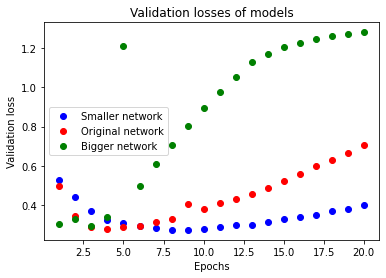

In [ ]:
s_val_loss_values=shistory_dict['val_loss']
b_val_loss_values= bhistory_dict['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,s_val_loss_values,'bo',label='Smaller network')
plt.plot(epochs,val_loss_values,'ro',label='Original network')
plt.plot(epochs,b_val_loss_values,'go',label='Bigger network')
plt.title("Validation losses of models")
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

# Adding L2 weight regularization to the model

In [ ]:
from keras import regularizers
wmodel= models.Sequential()
wmodel.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                        activation='relu',
                        input_shape=(10000,)))
wmodel.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                        activation='relu'))
wmodel.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
wmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss=losses.binary_crossentropy,
               metrics=[metrics.binary_accuracy])

whistory= wmodel.fit(partial_x_train,
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5671 - binary_accuracy: 0.7809 - val_loss: 0.4444 - val_binary_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3701 - binary_accuracy: 0.9002 - val_loss: 0.3622 - val_binary_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2983 - binary_accuracy: 0.9180 - val_loss: 0.3406 - val_binary_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2568 - binary_accuracy: 0.9327 - val_loss: 0.4018 - val_binary_accuracy: 0.8523
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2362 - binary_accuracy: 0.9399 - val_loss: 0.3279 - val_binary_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2178 - binary_accuracy: 0.9472 - val_loss: 0.3338 - val_binary_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - los

In [ ]:
whistory_dict= whistory.history
whistory_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

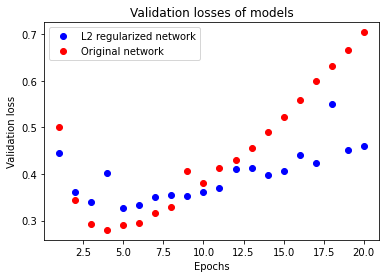

In [ ]:
w_val_loss_values= whistory_dict['val_loss']

epochs= range(1,len(acc)+1)

plt.plot(epochs,w_val_loss_values,'bo',label='L2 regularized network')
plt.plot(epochs,val_loss_values,'ro',label='Original network')
plt.title("Validation losses of models")
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

In [ ]:
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

# Adding dropout

In [ ]:
dmodel= models.Sequential()
dmodel.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
dmodel.add(layers.Dropout(0.5))
dmodel.add(layers.Dense(16,activation='relu'))
dmodel.add(layers.Dropout(0.5))
dmodel.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
dmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss=losses.binary_crossentropy,
               metrics=[metrics.binary_accuracy])

dhistory= dmodel.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.6045 - binary_accuracy: 0.6737 - val_loss: 0.4651 - val_binary_accuracy: 0.8491
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4722 - binary_accuracy: 0.7960 - val_loss: 0.3816 - val_binary_accuracy: 0.8675
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3898 - binary_accuracy: 0.8509 - val_loss: 0.3314 - val_binary_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3369 - binary_accuracy: 0.8793 - val_loss: 0.2964 - val_binary_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2876 - binary_accuracy: 0.9005 - val_loss: 0.2769 - val_binary_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2542 - binary_accuracy: 0.9155 - val_loss: 0.2722 - val_binary_accuracy: 0.8921
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

In [ ]:
dhistory_dict=dhistory.history
dhistory_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
w_val_loss_values= whistory_dict['val_loss']

epochs= range(1,len(acc)+1)

plt.plot(epochs,w_val_loss_values,'bo',label='L2 regularized network')
plt.plot(epochs,val_loss_values,'ro',label='Original network')
plt.title("Validation losses of models")
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

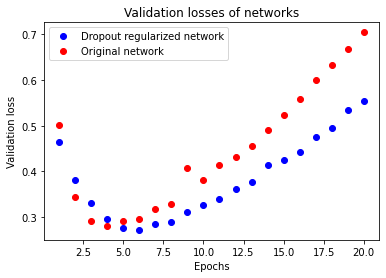

In [ ]:
d_val_loss_values= dhistory_dict['val_loss']

epochs= range(1,len(acc)+1)

plt.plot(epochs,d_val_loss_values,'bo',label='Dropout regularized network')
plt.plot(epochs,val_loss_values,'ro',label='Original network')
plt.title("Validation losses of networks")
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()